# Geometric Brownian Motion in Python

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set the seed
np.random.seed(42)

In [2]:
def brownian_motion(N, T, h):
    """Simulates a Brownian motion.
    
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param float h: the variance of the increments
    :returns tuplpe: the brownian motion and its increments
    """   
    # the normalizing constant
    dt = 1. * T/N
    # the epsilon values
    random_increments = np.random.normal(0.0, 1.0 * h, N)*np.sqrt(dt)
    # calculate the brownian motion
    brownian_motion = np.cumsum(random_increments)
    # insert the initial condition
    brownian_motion = np.insert(brownian_motion, 0, 0.0)
    
    return brownian_motion, random_increments

In [3]:
def geometric_brownian_motion(G0, mu, sigma, N, T):
    """Simulates a Geometric Brownian Motion.
    
    :param float G0: initial value
    :param float mu: drift coefficient
    :param float sigma: diffusion coefficient
    :param int N: number of discrete steps
    :param int T: number of continuous time steps
    :return list: the geometric Brownian Motion
    """
    # the normalizing constant
    dt = 1. * T/N
    # standard brownian motion
    W, _ = brownian_motion(N, T ,1.0)
    # generate the time steps
    time_steps = np.linspace(0.0, N*dt, N+1)
    
    # calculate the geometric brownian motion
    G = G0 * np.exp(mu * time_steps + sigma * W)
    # replace the initial value
    G[0] = G0
    
    return G

In [4]:
def gbm_mean(G0, mu, sigma, N, T):
    """Simulates the mean of the Geometric Brownian Motion, which is:
        E(t) = e^{(mu + sigma^{2}/2)*t}
    
    :param float G0: initial value
    :param float mu: drift coefficient
    :param float sigma: diffusion coefficient
    :param int N: number of discrete steps
    :param int T: number of continuous time steps
    """
    # generate the time steps
    t = np.linspace(0.0, T, N+1)
    # calculate the mean
    E = G0 * np.exp((mu + 0.5*sigma**2)*t)
    
    return E

In [5]:
def gbm_var(G0, mu, sigma, N, T):
    """Simulates the variance of the Geometric Brownian Motion, which is:
        Var(t) = e^{(2*mu + sigma^{2})*t} * (e^{sigma^{2}*t} - 1)
    
    :param float G0: initial value
    :param float mu: drift coefficient
    :param float sigma: diffusion coefficient
    :param int N: number of discrete steps
    :param int T: number of continuous time steps
    """
    # generate the time steps
    t = np.linspace(0.0, T, N+1)
    # calculate the variance
    V = G0**2 * np.exp(t * (2*mu + sigma**2)) * (np.exp(t * sigma**2) - 1)
    
    return V

# Plot one simulation of the GBM

In [6]:
G0 = 75.25 # the initial value
mu = -2.0 # the drift
sigma = 1.5 # the diffusial

N = 10000 # number of discret points
T = 6 # number of time units
dt = 1.0 * T/N  # total number of time steps

G = geometric_brownian_motion(G0, mu, sigma, N, T)
E = gbm_mean(G0, mu, sigma, N, T)
V = gbm_var(G0, mu, sigma, N, T)
t = np.linspace(0.0, N*dt, N+1)

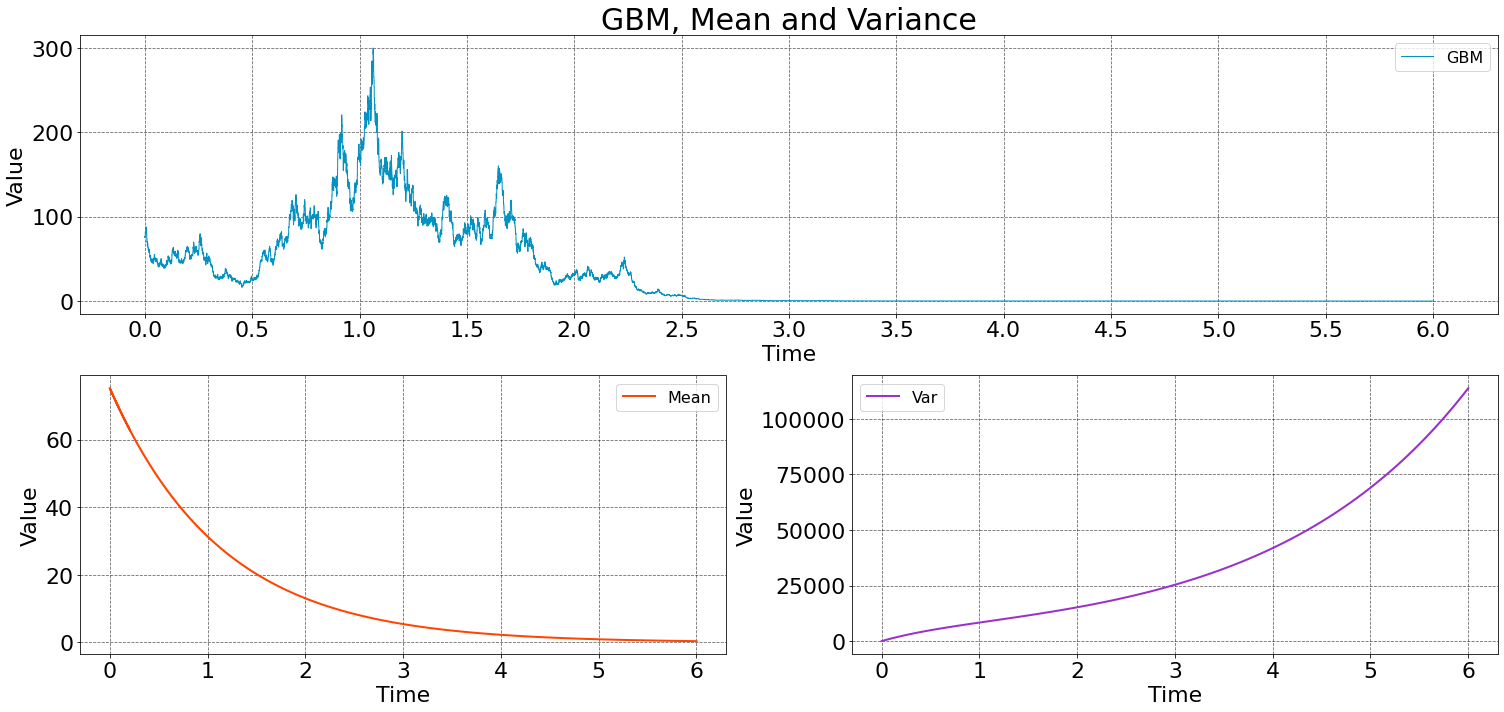

In [7]:
# define the axes objects
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(21, 10))

for i in range(2):
    for j in range(2):
        axs[i, j].set_xticks(np.linspace(0, T, T + 1))
        axs[i, j].set_xlabel('Time', fontsize=22)
        axs[i, j].set_ylabel('Value', fontsize=22)
        axs[i, j].tick_params(labelsize=22)
        axs[i, j].grid(True, which='major', linestyle='--', color='black', alpha=0.6)

gs = axs[0, 0].get_gridspec()
for ax in axs[0, 0:]:
    ax.remove()

axbig = fig.add_subplot(gs[0, 0:])

# plot the GBM
axbig.step(t, G, where='mid', lw=1, color='#0492c2', label='GBM')
axbig.set_title('GBM, Mean and Variance', fontsize=30)
axbig.set_xticks(np.linspace(0, T, 2*T + 1))
axbig.set_xlabel('Time', fontsize=22)
axbig.set_ylabel('Value', fontsize=22)
axbig.tick_params(labelsize=22)
axbig.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
axbig.legend(fontsize=16, fancybox=True)


# plot the Mean and Variance
axs[1, 0].step(t, E, where='mid', lw=2, color='#ff4500', label='Mean')
axs[1, 0].legend(fontsize=16, fancybox=True)

axs[1, 1].step(t, V, where='mid', lw=2, color='#9932cc', label='Var')
axs[1, 1].legend(fontsize=16, fancybox=True)


fig.tight_layout()
plt.show()

# Animation

MovieWriter stderr:
convert-im6.q16: no images defined `gbm_mean_var.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '1512x720', '-depth', '8', '-delay', '3.0', '-loop', '0', 'rgba:-', 'gbm_mean_var.gif']' returned non-zero exit status 1.

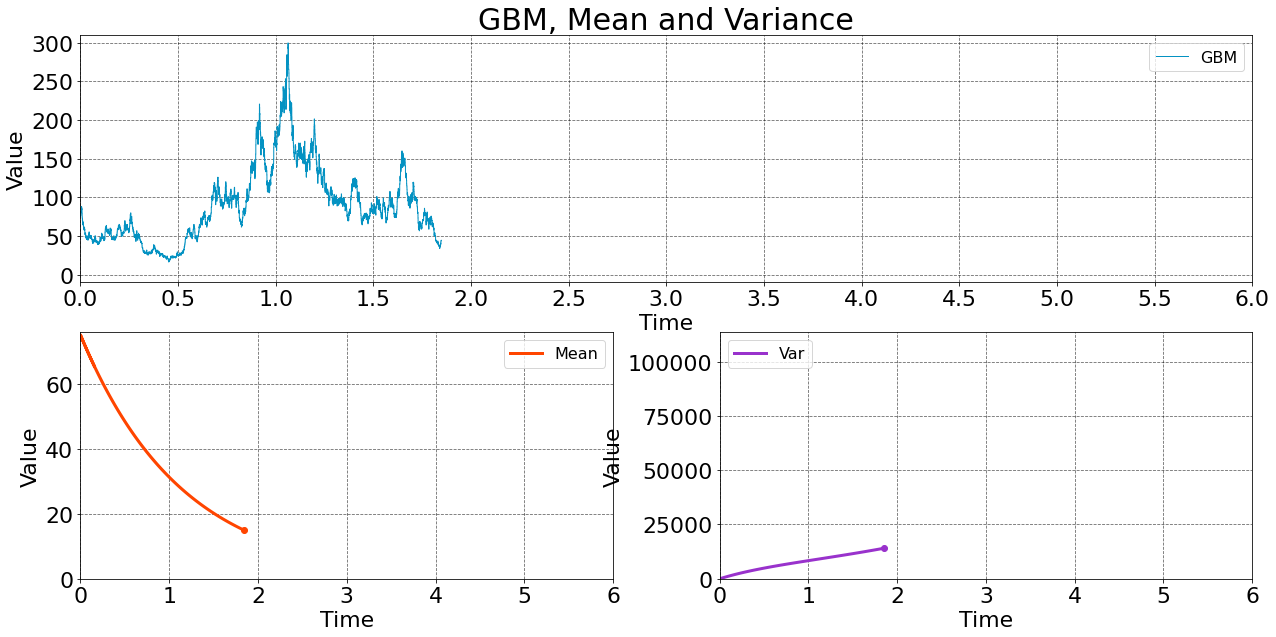

In [8]:
# define the axes objects
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(21, 10))

# formatting options for all axes
for i in range(2):
    for j in range(2):
        axs[i, j].set_xticks(np.linspace(0, T, T + 1))
        axs[i, j].set_xlabel('Time', fontsize=22)
        axs[i, j].set_ylabel('Value', fontsize=22)
        axs[i, j].tick_params(labelsize=22)
        axs[i, j].grid(True, which='major', linestyle='--', color='black', alpha=0.6)

# merge two axes horizontally
gs = axs[0, 0].get_gridspec()
for ax in axs[0, 0:]:
    ax.remove()

axbig = fig.add_subplot(gs[0, 0:])

# formatting options for the merged axes
axbig.set_title('GBM, Mean and Variance', fontsize=30)
axbig.set_xlim((0, T))
axbig.set_xticks(np.linspace(0, T, 2*T + 1))
axbig.set_xlabel('Time', fontsize=22)
axbig.set_ylim((np.min(G) - 10, np.max(G) + 10))
axbig.set_yticks(np.linspace(0, 300, 7))
axbig.set_ylabel('Value', fontsize=22)
axbig.tick_params(labelsize=22)
axbig.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

# initialize lines

# the GBM line
gbm_line, = axbig.step([], [], where='mid', lw=1, color='#0492c2', label='GBM')
axbig.legend(fontsize=16, fancybox=True)

# the Mean line
mean_line, = axs[1, 0].step([], [], where='mid', lw=3, color='#ff4500', label='Mean')
mean_line_point, = axs[1, 0].plot([], [],  marker='o', markersize=6, color="#ff4500")
axs[1, 0].set_xlim((0, T))
axs[1, 0].set_ylim((0.0, np.max(E) + 1))
axs[1, 0].legend(fontsize=16, fancybox=True)

# the Variance
var_line, = axs[1, 1].step([], [], where='mid', lw=3, color='#9932cc', label='Var')
var_line_point, = axs[1, 1].plot([], [], marker='o', markersize=6, color="#9932cc")
axs[1, 1].set_xlim((0, T))
axs[1, 1].set_ylim((0.0, np.max(V) + 1))
axs[1, 1].legend(fontsize=16, fancybox=True, loc=2)

frames = 500
factor = N // frames

def animate(i):
    # select values
    upper_bound = (i + 1)*factor
    
    t_i = t[:upper_bound]  # time values
    G_i = G[:upper_bound]  # GBM values
    E_i = E[:upper_bound]  # Mean values
    V_i = V[:upper_bound]  # Var valeus
    
    # Update the lines
    gbm_line.set_data(t_i, G_i)
    mean_line.set_data(t_i, E_i)
    mean_line_point.set_data([t[upper_bound - 1]], [E[upper_bound - 1]])  # point at the end of the line
    var_line.set_data(t_i, V_i)
    var_line_point.set_data([t[upper_bound - 1]], [V[upper_bound - 1]])  # point at the end of the line
    
    return gbm_line, mean_line, var_line, mean_line_point, var_line_point,

# call the animator
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=30, blit=True)
# save the animation as mp4 video file 
anim.save('gbm_mean_var.gif',writer='imagemagick') 

# Monte Carlo Simulation

In [9]:
num_simulations = 10 # the number of simulations
X0 = 75.25 # the initial value
mu = .23678 # the drift
sigma = .5392 # the diffusial

N = 2000 # number of discret points
T = 2 # number of time units
dt = 1.0 * T/N  # total number of time steps
t = np.linspace(0.0, N*dt, N+1)

Xs = []  # all simulated Geometric Brownian Motions
ii64 = np.iinfo(np.int64)  # the info for the int64 dtype
min_value = np.float64(ii64.max)  # set the min value to the max
max_value = np.float64(ii64.min)  # set the max value to the min
for i in range(num_simulations):  # simulate all GBMs
    np.random.seed(42 + i)  # reset the seed with different value
    Xs_i = geometric_brownian_motion(X0, mu, sigma, N, T)  # generate one GBM
    min_value = np.minimum(min_value, np.min(Xs_i))  # update the min value
    max_value = np.maximum(max_value, np.max(Xs_i))  # update the max value
    Xs.append(Xs_i)  # store the result

print('Min value is: {:.5f}'.format(min_value))
print('Max value is: {:.5f}'.format(max_value))

Min value is: 36.86361
Max value is: 583.32160


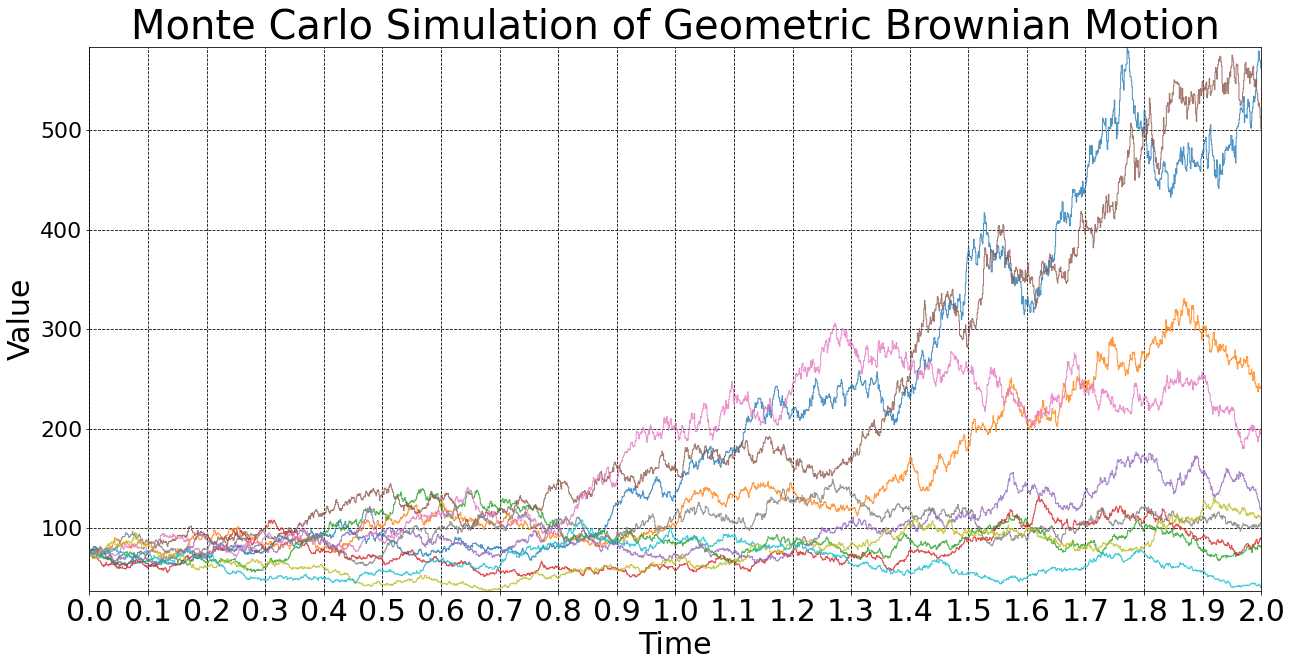

In [10]:
plt.figure(figsize=(21, 10))  # instantiate a figure
plt.xlim((0, T))
plt.ylim((min_value, max_value))

# formatting options
plt.title('Monte Carlo Simulation of Geometric Brownian Motion', fontsize=40)
plt.xticks(np.linspace(0, T, 10*T + 1), fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Value', fontsize=30)
plt.yticks(fontsize=22)
plt.grid(True, which='major', linestyle='--', color='black', alpha=1.0)

# plot every line
for i in range(num_simulations):
    plt.step(t, Xs[i], alpha=0.8, lw=1)

plt.savefig('monte_carlo_gbm.png', dpi=300, bbox_inches='tight')

## Animate the Monte Carlo Simulation

In [ ]:
fig = plt.figure(figsize=(21, 10))  # instantiate a figure
ax = plt.axes(xlim=(0, T), ylim=(min_value, max_value))  # create an axes object

lines = []  # one line for one GBM
for i in range(num_simulations):
    line, = ax.step([], [], where='mid', lw=1, alpha=0.8)
    lines.append(line)

# formatting options
ax.set_title('Monte Carlo Simulation of Geometric Brownian Motion', fontsize=40)
ax.set_xticks(np.linspace(0, T, 10*T + 1))
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Value', fontsize=30)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)


frames = 80
factor = N // frames

def animate(i):
    upper_bound = (i + 1)*factor
    t_i = t[:upper_bound]
    for j in range(num_simulations):
        lines[j].set_data(list(t_i), list(Xs[j][:upper_bound]))
    
    return lines

# call the animator
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
# save the animation as mp4 video file 
anim.save('gbm_monte_Carlo.gif',writer='imagemagick') 